<a href="https://colab.research.google.com/github/sipra1304/ML_projects/blob/main/breast_cancer_prediction_DTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#IMPORTING DATASET

In [ ]:
data=pd.read_csv('Breast_cancer_data.csv')

# ANALYZING THE DATASET

In [ ]:
print(data.size)
data.head(10)

3414


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


#VISUALIZING THE DATASET

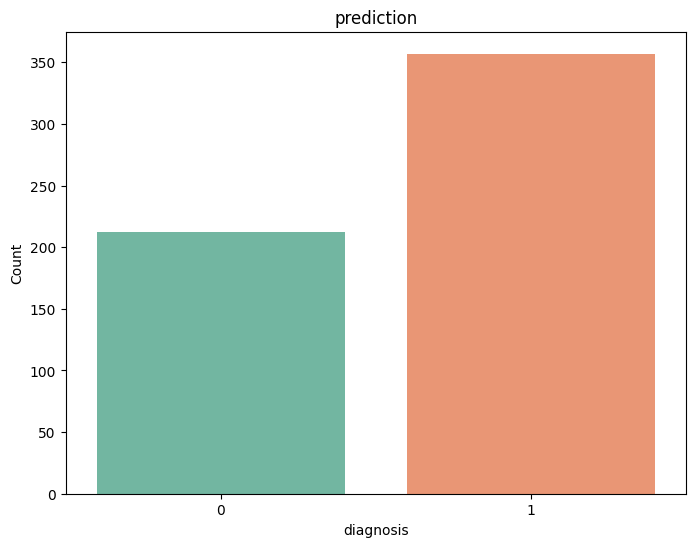

Prediction:
1    357
0    212
Name: diagnosis, dtype: int64


In [ ]:
# Count the occurrences of each class in the target variable
class_counts = data['diagnosis'].value_counts()

# Plot a bar graph to visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=data, palette='Set2')
plt.title('prediction')
plt.xlabel('diagnosis')
plt.ylabel('Count')
plt.show()

# Print the class counts
print("Prediction:")
print(class_counts)

#CONVERTING STRING DATA TO NUMERIC DATA

In [ ]:
categorical_columns = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'diagnosis']
for col in categorical_columns:
  data[col] = pd.to_numeric(data[col], errors='coerce')

#SPLITTING DATA INTO FEATURES(X) AND TARGET LABELS(Y)

In [ ]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

#SPLITTING DATASET INTO TRAINING AND TESTING SETS

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

#FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

#TRAINING THE MODEL USING DECISSION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred=model.predict(x_test)

#CHECKING OUR MODEL

In [ ]:
print(model.predict(sc.transform([[13.00,21.82,87.50,519.8,0.12730]])))

[0]


#GETTING ACCURACY SCORE

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93
